# Stock Closing Price Prediction using RNN.
(This project was a part of **Machine Learning Specialization with TF2** by [**CLOUDXLAB**](http://cloudxlab.com/))
## Context
This dataset is a playground for fundamental and technical analysis. It is said that 30% of traffic on stocks is already generated by machines, can trading be fully automated? If not, there is still a lot to learn from historical data.

## Acknowledgements
Prices were fetched from Yahoo Finance, fundamentals are from Nasdaq Financials, extended by some fields from EDGAR SEC databases.

## Goal
Let us build a model based on GRU to predict the closing price of a stock, say of YAHOO.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('/cxldata/datasets/project/ny_stock_prediction/prices-split-adjusted.csv', header = 0)

In [4]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [5]:
df.shape

(851264, 7)

In [6]:
df.symbol.unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

In [7]:
len(df.symbol.unique())

501

## Filtering YAHOO data
Let us filter the data related to YAHOO stocks and majorly work on how to predict the closing prices of YAHOO.

In [8]:
df_yahoo = df[df['symbol']=='YHOO']

In [9]:
df_yahoo.head()

,date,symbol,open,close,low,high,volume
713,2010-01-04,YHOO,16.940001,17.100000,16.879999,17.200001,16587400.0
1181,2010-01-05,YHOO,17.219999,17.230000,17.000000,17.230000,11718100.0
1649,2010-01-06,YHOO,17.170000,17.170000,17.070000,17.299999,16422000.0
2117,2010-01-07,YHOO,16.809999,16.700001,16.570000,16.900000,31816300.0
2585,2010-01-08,YHOO,16.680000,16.700001,16.620001,16.760000,15470000.0


In [10]:
df_yahoo.shape

(1762, 7)

## Exploring YAHOO data
Let us explore the data.

Let us use describe() to view statistical-details about the data.

Also, let us see if there are any null values in each column of the data using isnull().sum().

In [11]:
df_yahoo.describe()

,open,close,low,high,volume
count,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03
mean,27.297917,27.291992,26.975602,27.609977,1.996907e+07
std,11.412612,11.406846,11.289736,11.526101,1.376851e+07
min,11.300000,11.090000,11.090000,11.800000,2.586900e+06
25%,15.950000,15.920000,15.770000,16.110001,1.235152e+07
50%,26.770001,26.750000,26.495000,27.105001,1.639070e+07
75%,37.335000,37.377501,36.897501,37.689999,2.325988e+07
max,52.279999,52.369999,51.639999,52.619999,2.338721e+08


In [12]:
df_yahoo.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

## Setting the Index for the Data Frame
Since we are dealing with time-series data, it makes sense to see the date column as the index of our data frame.

We shall do this by using the set_index method on the df_yahoo data frame.

But before that, let us first convert the "date" column into DateTime type using the pd.to_datetime() method of pandas.

Note:

pd.to_datetime() is used to covert the type of column to datetime type.

set_index() method is used to set the data frame index using existing columns.

In [13]:
 df_yahoo['date']= pd.to_datetime(df_yahoo['date'])

/usr/local/anaconda/envs/tensorflow2/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df_yahoo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1762 entries, 713 to 851257
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1762 non-null   datetime64[ns]
 1   symbol  1762 non-null   object        
 2   open    1762 non-null   float64       
 3   close   1762 non-null   float64       
 4   low     1762 non-null   float64       
 5   high    1762 non-null   float64       
 6   volume  1762 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 110.1+ KB


In [15]:
 print(df_yahoo.date.dtype)

datetime64[ns]


In [16]:
df_yahoo = df_yahoo.set_index("date")

In [17]:
df_yahoo.head()

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,YHOO,16.940001,17.100000,16.879999,17.200001,16587400.0
2010-01-05,YHOO,17.219999,17.230000,17.000000,17.230000,11718100.0
2010-01-06,YHOO,17.170000,17.170000,17.070000,17.299999,16422000.0
2010-01-07,YHOO,16.809999,16.700001,16.570000,16.900000,31816300.0
2010-01-08,YHOO,16.680000,16.700001,16.620001,16.760000,15470000.0


## Setting the Frequency to Business Days
It is very important for a time series to have a frequency set, so as to consolidate that the data we are working on is free of any missing data.

Since we are working with stock-exchange time-series data, it makes sense to set the frequency of the time-series to business days, meaning the data is recorded for weekdays but not any weekends.

Thanks to pandas, there is a readily available method asfreq() to set the frequency for the time-series.

Note:

asfreq() method converts the time-series to specified frequency.

We could pass an argument to the method to denote frequency. For example, df.asfreq('d') implies to set the data to a daily frequency. Similarly,

'b' means business days

'30S' means 30 seconds

and so on.

In [18]:
print(df_yahoo.shape)

(1762, 6)


In [19]:
yahoo_data = df_yahoo.asfreq('b')

In [20]:
print(yahoo_data)

           symbol       open      close        low       high      volume
date                                                                     
2010-01-04   YHOO  16.940001  17.100000  16.879999  17.200001  16587400.0
2010-01-05   YHOO  17.219999  17.230000  17.000000  17.230000  11718100.0
2010-01-06   YHOO  17.170000  17.170000  17.070000  17.299999  16422000.0
2010-01-07   YHOO  16.809999  16.700001  16.570000  16.900000  31816300.0
2010-01-08   YHOO  16.680000  16.700001  16.620001  16.760000  15470000.0
...           ...        ...        ...        ...        ...         ...
2016-12-26    NaN        NaN        NaN        NaN        NaN         NaN
2016-12-27   YHOO  38.590000  38.919998  38.500000  39.070000   4240300.0
2016-12-28   YHOO  39.119999  38.730000  38.709999  39.220001   4393500.0
2016-12-29   YHOO  38.759998  38.639999  38.480000  38.930000   4170200.0
2016-12-30   YHOO  38.720001  38.669998  38.430000  39.000000   6431600.0

[1825 rows x 6 columns]


In [21]:
yahoo_data.tail()

,symbol,open,close,low,high,volume
date,,,,,,
2016-12-26,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-27,YHOO,38.590000,38.919998,38.500000,39.070000,4240300.0
2016-12-28,YHOO,39.119999,38.730000,38.709999,39.220001,4393500.0
2016-12-29,YHOO,38.759998,38.639999,38.480000,38.930000,4170200.0
2016-12-30,YHOO,38.720001,38.669998,38.430000,39.000000,6431600.0


In [22]:
yahoo_data.isnull().sum()

symbol    63
open      63
close     63
low       63
high      63
volume    63
dtype: int64

## Getting the Dates of Missing Values
Let us see if the missing values are due to the official holidays of NYSE or due to some other unknown factors.

In case the dates are of official holidays, then those values can't be accounted for as missing. Else, we have to come up with ways to fill those missing values.

So first, let us first filter the null rows and get the dates of these missing values.

Note:

any() returns whether any element is True, potentially over an axis.

isnull().any(axis=1) returns a dataframe which contains null values along the rows.

df.index gets the indices of the data frame.

df.index.tolist() returns the list representation of the indexes of the data frame.

In [23]:
null_data = yahoo_data[yahoo_data.isnull().any(axis=1) ]


In [24]:
null_data.head()

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-15,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-02,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-31,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-05,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
null_dates = null_data.index.tolist()

## Filtering out the Holidays
Let us check if the dates of missing values fall in any holidays official for NYSE. A quick check at the NYSE official website would help us know the list of official holidays of NYSE.

Now that we know the list of official holidays for NYSE, we use the calendar module and datetime module to check if a given date in the null_dates list is a holiday or not. We do this by:

Determining if that week or day name of the date in that month is a holiday or not. For example, Washington's Birthday is celebrated on the third Monday of February.
So we extract the week, day, month, year from a given date in null_dates, and check if the day falls between 15 and 21(the possible day range of third Monday) and if the week is Monday.
If yes, then it is a holiday. Then we append that date in the holidays list. We took a list of the dates when Good Friday occurs since there is no particular way to determine it.
Finally, after obtaining the entire list of holidays, we filter out the holidays dates from null_dates and store the non-holiday dates in the list non_holidays.

In [26]:
import calendar
import datetime

holidays = []

for date in null_dates:
    week, day, month, year = date.weekday(), date.day, date.month, date.year
    week_day = calendar.day_name[week]

    if month==1:
        if day==1:
            # New year day
            holidays.append(date)
        elif day==2 and week_day=='Monday':
            # Observed New Year Day
            holidays.append(date)
        elif day>=15 and day<=21 and week_day=='Monday':
            # Martin Luther King, Jr. Day
            holidays.append(date)

    elif month==2:
        # Washington's Birthday
        if day>=15 and day<=21 and week_day=='Monday':
            holidays.append(date)

    elif month==5:
        # Memorial day
        if day>=25 and day<=31 and week_day=='Monday':
            holidays.append(date)

    elif month==7:
        # Independence day
        if day==4:
            holidays.append(date)
        # Observed Independence  Day
        elif day==5 and week_day=='Monday':
            holidays.append(date)
        elif day==3 and week_day=='Friday':
            holidays.append(date)

    elif month == 9:
        # Labour day
        if day>=1 and day<=7 and week_day=='Monday':
            holidays.append(date)

    elif month==11:
        # Thanksgiving Day
        if week_day=='Thursday' and day>=22 and day<=28:
            holidays.append(date)

    elif month==12:
        # Christmas Day
        if day==25:
            holidays.append(date)
        # Observed Christmas Day
        elif day==24 and week_day=='Friday':
            holidays.append(date)
        elif day==26 and week_day=='Monday':
            holidays.append(date)

good_fridays = [ datetime.date(2010,4,2), datetime.date(2011,4,22), datetime.date(2012,4,6), datetime.date(2013,3,29), datetime.date(2014,4,18), datetime.date(2015,4,3), datetime.date(2016,3,25) ]
holidays = holidays + [pd.to_datetime(date) for date in good_fridays]

non_holidays = [x for x in null_dates if x not in holidays]
print(non_holidays)

[Timestamp('2012-10-29 00:00:00'), Timestamp('2012-10-30 00:00:00')]


We observe that the values are missing for October 29th and 30th of 2012.

## Getting the Modified Data
Let us remove the rows that belong to the holidays using the drop() method on the yahoo_data data frame.

In [30]:
print(yahoo_data.shape)

(1825, 6)


In [33]:
modified_df = yahoo_data.drop(holidays)

In [34]:
print(modified_df.shape)

(1764, 6)


## Filling the Missing Values
Now that we know that there are two missing values in the data, we have to fill those missing values.

Note:

Pandas provides some built-in methods to do this job.

bfill - used to backward fill or use the next valid observation to fill the missing values in the dataset.
ffill - used to forward fill or use the previous valid observation to fill the missing values in the dataset.
using fillna(metohd='bfill') is another way of achieving the job using backward filling. Similarly, one could use ffill or any other way like mean().
Let us use bfill() to fill the two missing values.

In [37]:
print("Before filling missing values:\n", modified_df.isna().sum())

Before filling missing values:
 symbol    2
open      2
close     2
low       2
high      2
volume    2
dtype: int64


In [38]:
modified_df = modified_df.bfill(axis ='rows')

In [39]:
print("\nAfter filling missing values:\n",modified_df.isna().sum())


After filling missing values:
 symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64


## Visualizing YAHOO Data
Now, let us have a look at how the closing values of YAHOO data look like.

Below defined is the plotter function which extracts the close values, reshapes the data into columnar data, and uses that to plots the data.

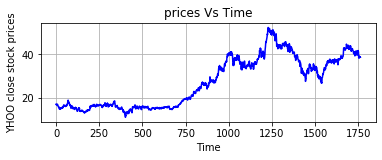

In [42]:
def plotter(code):
    global closing_stock
    plt.subplot(211)
    company_close = modified_df[modified_df['symbol']==code]
    company_close = company_close.close.values.astype('float32')
    company_close = company_close.reshape(-1, 1)
    closing_stock = company_close
    plt.xlabel('Time')
    plt.ylabel(code + " close stock prices")
    plt.title('prices Vs Time')
    plt.grid(True)
    plt.plot(company_close , 'b')
    plt.show()

plotter("YHOO")

## Splitting the Data
Let us split the closing_stock into 3 parts, for training, validation, and testing purposes.

Let us have 80% of the data in the train set, 10% in the validation set, and the remaining 10% in the test set.

In [46]:
n_train = int(len(closing_stock) * 0.80)
n_remaining = len(closing_stock) - n_train

n_val = int(n_remaining*0.50)
n_test = n_remaining - n_val 
print("Train samples:",n_train, "Validation Samples:",n_val,"Test Samples:", n_test)

Train samples: 1411 Validation Samples: 176 Test Samples: 177


In [47]:
train_data = closing_stock[0:n_train]
print(train_data.shape)

(1411, 1)


In [48]:
val_data = closing_stock[n_train:n_train+n_val]
print(val_data.shape)

(176, 1)


In [49]:
test_data = closing_stock[n_train+n_val:]
print(test_data.shape)

(177, 1)


## Feature Scaling
Let us then use MinMaxScaler, a module from sklearn library to scale the values into the range of 0 and 1. More about it here

We shall do this feature scaling as follows:

Use fit_transform to transform features by scaling each feature. We shall do this fitting on the train data train_data.

Then, use the transform method on the same scaler to transform the values of val_data and test_data.

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [56]:
train = scaler.fit_transform(train_data)

In [57]:
val = scaler.transform(val_data)

In [58]:
test = scaler.transform(test_data)

## Creating the Dataset
In this exercise, we are going to use GRU, which is one of the quite useful deep learning algorithms to deal with time-series data.

It expects the input data to be three-dimensional. The first dimension indicates the batch size, the second dimension is the timestamps and the third dimension is the number of features.

Let us feed 2 values to predict the next value. To create the data set, let us define the create_dataset function.

In the function, we will be traversing till the last third row of the dataset, combine every two consecutive values as one input, and put the third value as the value to be predicted(ground truth of prediction).

In [67]:
def create_dataset(data , n_features):
    dataX, dataY = [], []
    for i in range(len(data)-n_features-1):
        a = data[i:(i+n_features), 0]
        dataX.append(a)
        dataY.append(data[i + n_features, 0])
    return np.array(dataX), np.array(dataY)

In [68]:
n_features = 2

In [69]:
trainX, trainY = create_dataset(train, n_features)
valX, valY = create_dataset(val, n_features)
testX, testY = create_dataset(test, n_features)

In [70]:
print(trainX.shape , trainY.shape , valX.shape , valY.shape, testX.shape , testY.shape)

(1408, 2) (1408,) (173, 2) (173,) (174, 2) (174,)


In [71]:
trainX = trainX.reshape(trainX.shape[0] , 1 ,trainX.shape[1])
valX = valX.reshape(valX.shape[0] , 1 ,valX.shape[1])
testX = testX.reshape(testX.shape[0] , 1 ,testX.shape[1])

In [72]:
print(trainX.shape , trainY.shape , valX.shape , valY.shape, testX.shape , testY.shape)

(1408, 1, 2) (1408,) (173, 1, 2) (173,) (174, 1, 2) (174,)


## Building the Model
Finally, we have reached the modeling part.

As discussed previously, we shall use a GRU based model.

Firstly, let us import the necessary TensorFlow and Scikit-Learn libraries.

Next, we shall build the model by adding layers, compiling it, and then fitting the model on the train data.

A bit about the model we are going to build:

The model we are going to use is a stacked GRU.
So the output of one GRU layer should act as the input to the next GRU layer stacked above the former one and so on.
We have already discussed that the GRU/LSTM layers in Keras expect the input to be in three-dimensional.
Thus, we have to make sure that the output from a previous layer is formatted in a three-dimensional way so as to provide it as input to the next layer.
This job could be achieved by setting return_sequences=True in the GRU layers whose output would potentially act as the input to the next GRU layer.

In [80]:
import tensorflow as tf
tf.random.set_seed(42)

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

In [81]:
model = keras.Sequential()

In [82]:
# First GRU layer
model.add(layers.GRU(units=100, return_sequences=True, input_shape=(1,n_features), activation='tanh'))
model.add(layers.Dropout(0.2))

# Second GRU layer
model.add(layers.GRU(units=150, return_sequences=True, input_shape=(1,n_features), activation='tanh'))
model.add(layers.Dropout(0.2))

# Third GRU layer
model.add(layers.GRU(units=100, activation='tanh'))
model.add(layers.Dropout(0.2))

# The output layer
model.add(layers.Dense(units=1, kernel_initializer='he_uniform', activation='linear'))

In [83]:
model.compile(loss='mean_squared_error', optimizer=Adam(lr = 0.0005) , metrics = ['mean_squared_error'])

In [84]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 1, 100)            31200     
_________________________________________________________________
dropout (Dropout)            (None, 1, 100)            0         
_________________________________________________________________
gru_1 (GRU)                  (None, 1, 150)            113400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 150)            0         
_________________________________________________________________
gru_2 (GRU)                  (None, 100)               75600     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1

In [85]:
history = model.fit(trainX,trainY,epochs=100,batch_size=128, verbose=1, validation_data = (valX,valY))

Train on 1408 samples, validate on 173 samples
Epoch 1/100
1408/1408 [==============================] - 6s 4ms/sample - loss: 0.1346 - mean_squared_error: 0.1346 - val_loss: 0.0960 - val_mean_squared_error: 0.0960
Epoch 2/100
1408/1408 [==============================] - 0s 89us/sample - loss: 0.0408 - mean_squared_error: 0.0408 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 3/100
1408/1408 [==============================] - 0s 96us/sample - loss: 0.0254 - mean_squared_error: 0.0254 - val_loss: 7.2355e-04 - val_mean_squared_error: 7.2355e-04
Epoch 4/100
1408/1408 [==============================] - 0s 92us/sample - loss: 0.0130 - mean_squared_error: 0.0130 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 5/100
1408/1408 [==============================] - 0s 92us/sample - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 5.2540e-04 - val_mean_squared_error: 5.2540e-04
Epoch 6/100
1408/1408 [==============================] - 0s 97us/sample - loss: 0.0027 - mean_squa

## Evaluating the Model Performance
Let us now compute the model score on train data, validation data, and test data.

We shall use the model.evaluate() and print the Mean Squared Error and Root Mean Squared Error for each of the train, validation and test sets

In [91]:
import math

def model_score(model, X_train, y_train, X_val, y_val , X_test, y_test):
    print('Train Score:')
    train_score = model.evaluate(X_train, y_train, verbose=0)
    print("MSE: {:.5f} , RMSE: {:.2f}".format(train_score[0], math.sqrt(train_score[0])))

    print('Validation Score:')
    val_score = model.evaluate(X_val, y_val, verbose=0)
    print("MSE: {:.5f} , RMSE: {:.2f}".format (val_score[0], math.sqrt(val_score[0])))

    print('Test Score:')
    test_score = model.evaluate(X_test, y_test, verbose=0)
    print("MSE: {:.5f} , RMSE: {:.2f}".format (test_score[0], math.sqrt(test_score[0])))


model_score(model, trainX, trainY ,valX, valY , testX, testY)

Train Score:
MSE: 0.00024 , RMSE: 0.02
Validation Score:
MSE: 0.00036 , RMSE: 0.02
Test Score:
MSE: 0.00032 , RMSE: 0.02


## Visualizing Loss vs Epochs
Now that we have built the model, let us visualize how the model loss varies with respect to the epoch for the train data and validation data using matplotlib.

In [94]:
print(history.history.keys())

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


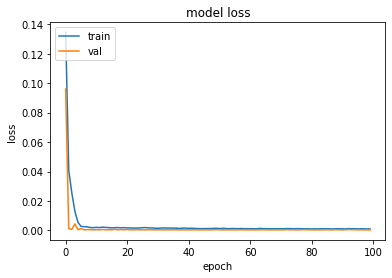

In [96]:
plt.plot(history.history['loss'])  # plotting train loss
plt.plot(history.history['val_loss'])  # plotting validation loss

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Visualizing Predictions vs Ground Truths
Let us now plot the predicted stock prices vs the actual ground truth values.

We shall use model.predict() to get the predicted values of the test data set.

In [97]:
pred = model.predict(testX)

Since we have scaled the actual values of the dataset, we need to inverse transform the values. So, inverse transform the predicted values using scaler.inverse_transform() and pass the pred as an argument.

In [98]:
pred = scaler.inverse_transform(pred)
print(pred[:10])

[[37.282978]
 [37.061287]
 [36.90252 ]
 [36.760967]
 [36.478477]
 [36.36601 ]
 [36.324596]
 [35.969063]
 [35.790546]
 [36.38826 ]]


In [99]:
# reshape the test set and inverse transform the test set values.
testY_actual = testY.reshape(testY.shape[0] , 1)
testY_actual = scaler.inverse_transform(testY_actual)
print(testY_actual[:10])

[[37.23]
 [37.11]
 [36.95]
 [36.59]
 [36.6 ]
 [36.53]
 [36.01]
 [36.  ]
 [36.94]
 [37.23]]


Let us now use pred and testY_actual and visualize their graphs to depict the predicted and actual values with respect to time.

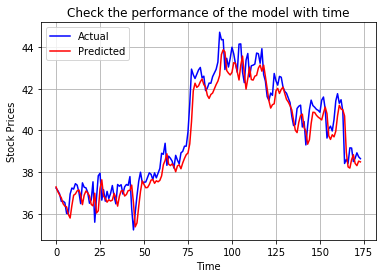

In [100]:
plt.plot(testY_actual , 'b')
plt.plot(pred , 'r')

plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the performance of the model with time')
plt.legend(['Actual', 'Predicted'], loc='upper left')

plt.grid(True)
plt.show()